<a href="https://colab.research.google.com/github/Ravi-shankar100/ANN-and-CNN-from-Udemy/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Importing the Dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full) , (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top","Trouser","pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
#Data Reshape as CNN requires 3 dimensional input for network unlike for the ANN
#This is the only difference for ANN and CNN for this dataset

X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [ ]:
X_train_full.shape , X_test.shape 

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#Data Normalization

X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [ ]:
#Train Test Split

X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_train.shape,X_test.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#Create the Model Architecture

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,strides=1,padding="valid",kernel_size=(3,3),activation="relu",input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
model_history = model.fit(X_train,y_train,epochs=30,batch_size=64,
                          validation_data = (X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 10s 3ms/step - loss: 1.2805 - accuracy: 0.5729 - val_loss: 0.7468 - val_accuracy: 0.7374
Epoch 2/30
860/860 [==============================] - 2s 3ms/step - loss: 0.5661 - accuracy: 0.7956 - val_loss: 0.4954 - val_accuracy: 0.8184
Epoch 3/30
860/860 [==============================] - 2s 3ms/step - loss: 0.4941 - accuracy: 0.8206 - val_loss: 0.8780 - val_accuracy: 0.7128
Epoch 4/30
860/860 [==============================] - 2s 3ms/step - loss: 0.4541 - accuracy: 0.8390 - val_loss: 0.4158 - val_accuracy: 0.8568
Epoch 5/30
860/860 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8443 - val_loss: 0.4382 - val_accuracy: 0.8462
Epoch 6/30
860/860 [==============================] - 2s 3ms/step - loss: 0.3978 - accuracy: 0.8565 - val_loss: 0.3767 - val_accuracy: 0.8700
Epoch 7/30
860/860 [==============================] - 2s 3ms/step - loss: 0.3819 - accuracy: 0.8655 - val_loss: 0.4103 - val_accuracy: 0.8540
Epoch

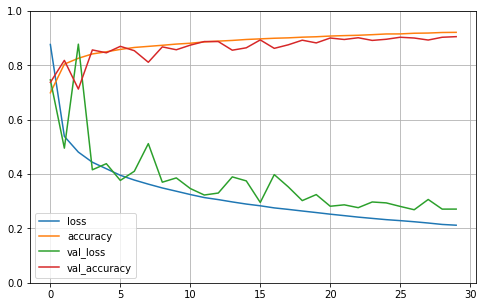

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
ev = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8991


In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

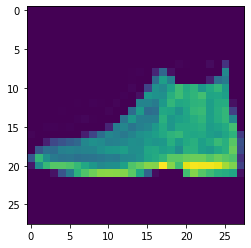

In [ ]:
#Displaying the image and convertinf from 3D to 2D

plt.imshow(X_test[0].reshape((28,28)))